In [5]:
"""
#forecasting procedure:
1.choose a model
2.split into train and test
3.fit model into training ds
4.evaluate model on test set
5.re fit model on entire ds
6.forecast the future data
"""



'\n#forecasting procedure:\n1.choose a model\n2.split into train and test\n3.fit model into training ds\n4.evaluate model on test set\n5.re fit model on entire ds\n6.forecast the future data\n'

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
df=pd.read_csv('tser_lec/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.index.freq='MS'

In [10]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
train_data=df.iloc[:109]#.loc['2929-29-29']
test_data=df.iloc[108:]

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
fitted_model=ExponentialSmoothing(train_data['Thousands of Passengers'],
                                             trend='mul',
                                             seasonal='mul',
                                             seasonal_periods=12
                                             ).fit()

In [14]:
test_predictions=fitted_model.forecast(36)

In [15]:
test_predictions

1958-02-01    339.137622
1958-03-01    399.272453
1958-04-01    394.220606
1958-05-01    402.536027
1958-06-01    473.133366
1958-07-01    521.802945
1958-08-01    514.531957
1958-09-01    446.226218
1958-10-01    385.432456
1958-11-01    339.645779
1958-12-01    381.448514
1959-01-01    401.209020
1959-02-01    387.152183
1959-03-01    455.800806
1959-04-01    450.033726
1959-05-01    459.526432
1959-06-01    540.118829
1959-07-01    595.678969
1959-08-01    587.378566
1959-09-01    509.402210
1959-10-01    440.001365
1959-11-01    387.732284
1959-12-01    435.453383
1960-01-01    458.011549
1960-02-01    441.964567
1960-03-01    520.332353
1960-04-01    513.748779
1960-05-01    524.585447
1960-06-01    616.587986
1960-07-01    680.014242
1960-08-01    670.538680
1960-09-01    581.522557
1960-10-01    502.296052
1960-11-01    442.626798
1960-12-01    497.104174
1961-01-01    522.856089
Freq: MS, dtype: float64

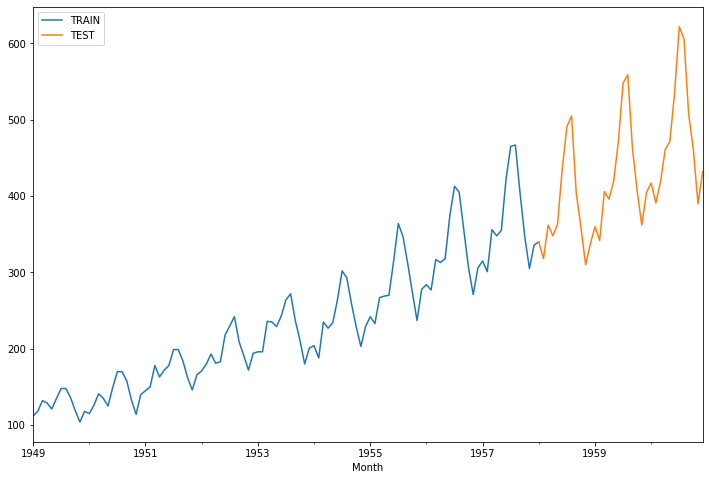

In [16]:
train_data['Thousands of Passengers'].plot(label='TRAIN',legend=True,figsize=(12,8))
test_data['Thousands of Passengers'].plot(label='TEST',legend=True,figsize=(12,8))

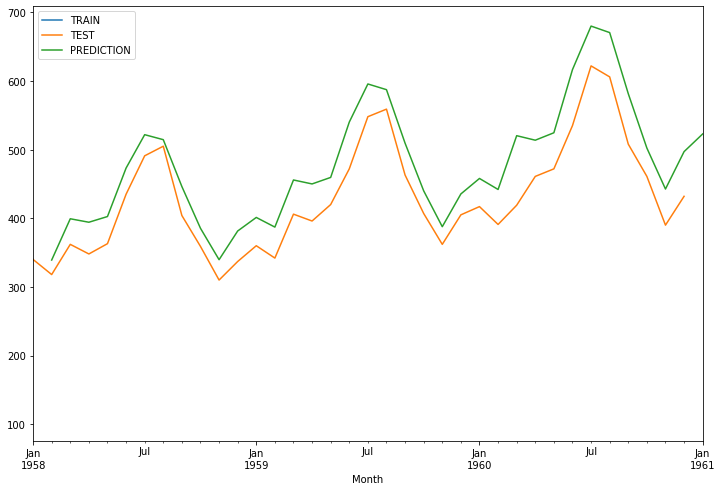

In [17]:
train_data['Thousands of Passengers'].plot(label='TRAIN',legend=True,figsize=(12,8))
test_data['Thousands of Passengers'].plot(label='TEST',legend=True,figsize=(12,8))
test_predictions.plot(label='PREDICTION',legend=True,xlim=['1958-01-01','1961-01-01'])

In [18]:
#evaluating prediction
"""
evaluating matrices for regression:
.mean absolute error
.mean squared error
.root mean square error
y-real value of test data
y^-the predicted value from our forecast

"""

'\nevaluating matrices for regression:\n.mean absolute error\n.mean squared error\n.root mean square error\ny-real value of test data\ny^-the predicted value from our forecast\n\n'

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [22]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [21]:
mean_absolute_error(test_data,test_predictions)

63.0282862810754

In [24]:
mean_squared_error(test_data,test_predictions)

5613.837862455122

In [25]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92554879648945

In [26]:
final_model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [27]:
forecast_predictions=final_model.forecast(36)

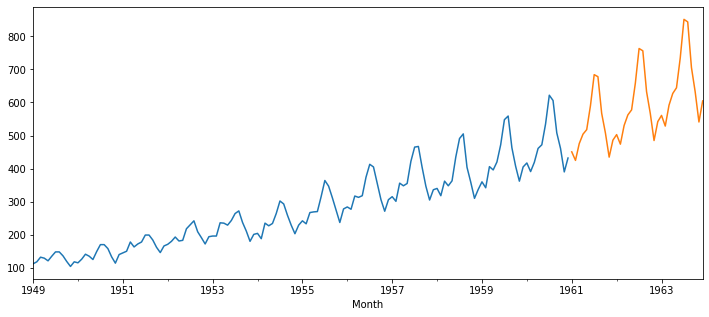

In [30]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_predictions.plot()

In [31]:
#stationary and non-stationary data
df2=pd.read_csv('tser_lec/Data/samples.csv',index_col=0,parse_dates=True)

In [32]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


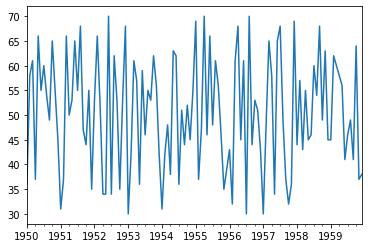

In [33]:
df2['a'].plot()
#if we do not have trend and seasonility called stationary data


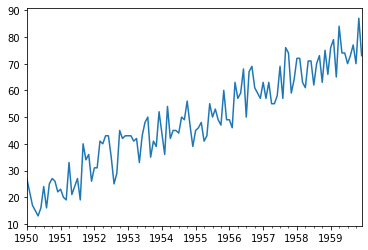

In [34]:
df2['b'].plot()
#stationary data

In [37]:
from statsmodels.tsa.statespace.tools import diff

In [39]:
df2['b']-df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

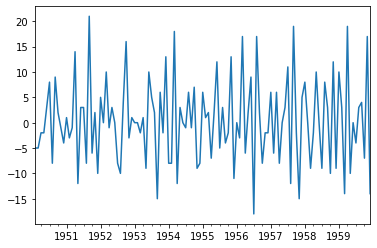

In [41]:
diff(df2['b'],k_diff=1).plot()#convert non-stationary to stationary

# ACF(auto corelation func plots) AND PACF(partial auto corealation function plots)

In [43]:

"""corealtion=-1 to +1
+1=stronger the postive linear relationship(one goes up anthor goes up)
-1=stronger the negative linear relationship(one goes up anthor goes down)
0=weaker the relation ship and association
autocorelation plots=also known correogram which shows corealtion of series with itself lagged(shift) by x units
so y axis is corelation and x is the no of corealtion
ACF-describes autocorelation between an observation and anthor observation with direct and indicrect info
partial autocorelation plots-describes the an observation and its lag
"""

'corealtion=-1 to +1\n+1=stronger the postive linear relationship(one goes up anthor goes up)\n-1=stronger the negative linear relationship(one goes up anthor goes down)\n0=weaker the relation ship and association\nautocorelation plots=also known correogram which shows corealtion of series with itself lagged(shift) by x units\nso y axis is corelation and x is the no of corealtion\nACF-describes autocorelation between an observation and anthor observation with direct and indicrect info\npartial autocorelation plots-describes the an observation and its lag\n'

In [45]:
import pandas as pd
import numpy as np
%matplotlib inline

In [46]:
import statsmodels.api as sm


In [50]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [51]:
#non-stationary
df1=pd.read_csv('tser_lec/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq='MS'

In [54]:
#stationary
df2=pd.read_csv('tser_lec/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

In [55]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [56]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [57]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
#example
df=pd.DataFrame({'a':[13,5,11,12,9]})
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [64]:
pacf_yw(df['a'],nlags=4,method='mle')#nlags=row-1#maximum likely hood estimation

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [65]:
pacf_yw(df['a'],nlags=4,method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [66]:
pacf_ols(df['a'],nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [67]:
from pandas.plotting import lag_plot

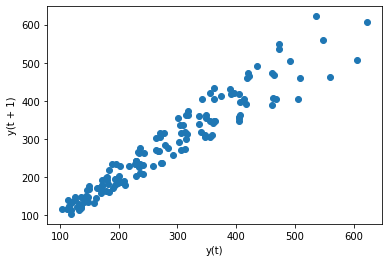

In [68]:
lag_plot(df1['Thousands of Passengers'])

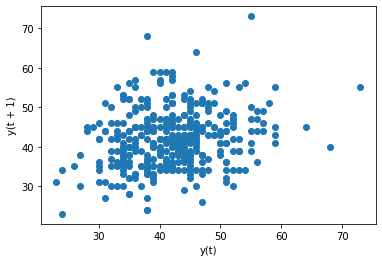

In [69]:
lag_plot(df2['Births'])

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

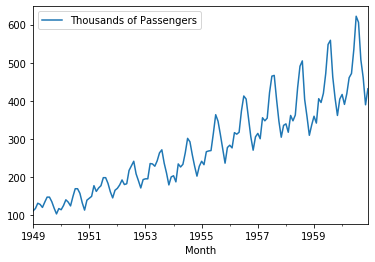

In [72]:
df1.plot()

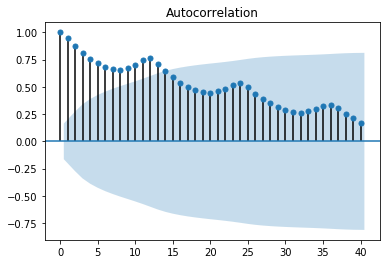

In [74]:
#non-stationary
plot_acf(df1,lags=40);

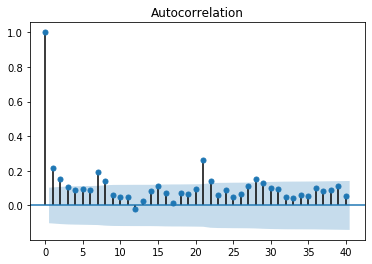

In [76]:
#stationary
plot_acf(df2,lags=40);

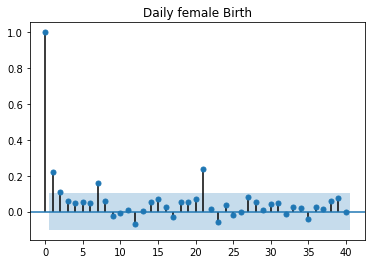

In [80]:
#pacf work best in stationary
plot_pacf(df2,lags=40,title='Daily female Birth');